##About the Dataset:
Dataset used in this project consists of a collection of tweets that were posted during covid-19 pandemic by users from different locations across the globe.
Datset consists of tweets and sentiments reflected from them, alongwith other information like location, date, username etc.

#Preprocessing
* Preprocessing
* hashtags, mentions, URLs, punctuation, special characters removal
* lowercasing
* WordCloud visualizaion
* Label Preprocessing
* Text normalization
* Stemming
* Lemmatization
* Stopword Removal
* Vectorization (using TF-IDF)
* Train-Test split


# ML Algorithms Used
* K Nearest Neioughbors
* Support Vector Machine Algorithm(SVM)
* Multinomial NB
* LogisticRegression
* DecisionTreeClassifier
* RandomForestClassifier
* AdaBoostClassifier






In [8]:
import pandas as pd
import re
import nltk
from nltk.stem import SnowballStemmer
from nltk import TweetTokenizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from  sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from nltk.util import ngrams
import nltk

In [9]:
df_train=pd.read_csv("/content/Corona_NLP_train.csv",encoding="ISO-8859-1",nrows=6000)
df_test=pd.read_csv("/content/Corona_NLP_test.csv",encoding="ISO-8859-1",nrows=6000)

In [10]:
df_train.isna().sum()

UserName            0
ScreenName          0
Location         1212
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [11]:
df_test.isna().sum()

UserName           0
ScreenName         0
Location         834
TweetAt            0
OriginalTweet      0
Sentiment          0
dtype: int64

In [12]:
df_train.dtypes

UserName          int64
ScreenName        int64
Location         object
TweetAt          object
OriginalTweet    object
Sentiment        object
dtype: object

In [13]:
df_test.dtypes

UserName          int64
ScreenName        int64
Location         object
TweetAt          object
OriginalTweet    object
Sentiment        object
dtype: object

In [14]:
df_train.drop(['UserName', 'ScreenName','Location', 'TweetAt' ], axis=1, inplace=True)
df_train

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...
5995,I expect that one of these days everyone will ...,Negative
5996,Looking for ways to help your community Go to ...,Positive
5997,Hey @asda @AsdaServiceTeam my friend went into...,Extremely Positive
5998,"Our industry is adaptable, resilient, and read...",Positive


In [15]:
df_test.drop(['UserName', 'ScreenName','Location', 'TweetAt' ], axis=1, inplace=True)
df_test

,OriginalTweet,Sentiment
0,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,When I couldn't find hand sanitizer at Fred Me...,Positive
2,Find out how you can protect yourself and love...,Extremely Positive
3,#Panic buying hits #NewYork City as anxious sh...,Negative
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
...,...,...
3793,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,Did you panic buy a lot of non-perishable item...,Negative
3795,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
3796,Gov need to do somethings instead of biar je r...,Extremely Negative


In [16]:
df_train["Sentiment"] =df_train["Sentiment"].str.replace("Extremely Negative", "Negative")
df_train["Sentiment"] =df_train["Sentiment"].str.replace("Extremely Positive", "Positive")

df_test['Sentiment'] =df_test.Sentiment.str.replace('Extremely Positive', 'Positive')
df_test['Sentiment'] =df_test.Sentiment.str.replace('Extremely Negative', 'Negative')

In [17]:
df_train


,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Negative
...,...,...
5995,I expect that one of these days everyone will ...,Negative
5996,Looking for ways to help your community Go to ...,Positive
5997,Hey @asda @AsdaServiceTeam my friend went into...,Positive
5998,"Our industry is adaptable, resilient, and read...",Positive


In [18]:
df_test

,OriginalTweet,Sentiment
0,TRENDING: New Yorkers encounter empty supermar...,Negative
1,When I couldn't find hand sanitizer at Fred Me...,Positive
2,Find out how you can protect yourself and love...,Positive
3,#Panic buying hits #NewYork City as anxious sh...,Negative
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
...,...,...
3793,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,Did you panic buy a lot of non-perishable item...,Negative
3795,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
3796,Gov need to do somethings instead of biar je r...,Negative


In [19]:
data=pd.concat([df_train,df_test], ignore_index= True)
data

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Negative
...,...,...
9793,Meanwhile In A Supermarket in Israel -- People...,Positive
9794,Did you panic buy a lot of non-perishable item...,Negative
9795,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
9796,Gov need to do somethings instead of biar je r...,Negative


In [20]:
data.dropna(inplace=True)

In [21]:
data.isna().sum()

OriginalTweet    0
Sentiment        0
dtype: int64

In [22]:
# preprocessing
def remove_urls(text):
    text = re.sub(r'http\S+',' ',text)# remove URLs
    text=re.sub(r'<,*?>',' ',text)#to remove html tags
    text=re.sub(r'\d+',' ',text)# remove digit
    text=re.sub(r'#\w+',' ',text)# remove hasttags
    textt=re.sub(r'@\w+',' ',text)#remove mentions
    return text
data["OriginalTweet"] = data['OriginalTweet'].apply(remove_urls)



In [23]:
txt=data["OriginalTweet"].str.replace('[^a-zA-Z0-9]+'," ")# replaced with a space " "
txt
txt1=txt

<ipython-input-23-4c393152b9e8>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  txt=data["OriginalTweet"].str.replace('[^a-zA-Z0-9]+'," ")# replaced with a space " "


In [24]:
stemmer=SnowballStemmer("english")
tk=TweetTokenizer()

In [25]:
#tokenizing lowercase 
txt=txt.apply(lambda x:[stemmer.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda y:" ".join(y))
txt

0                     menyrbi phil gahan chrisitv and and
1       advic talk to your neighbour famili to exchang...
2       coronavirus australia woolworth to give elder ...
3       my food stock is not the onli one which is emp...
4       me readi to go at supermarket dure the outbrea...
                              ...                        
9793    meanwhil in a supermarket in israel peopl danc...
9794    did you panic buy a lot of non perish item ech...
9795    asst prof of econom cconc was on nbcphiladelph...
9796    gov need to do someth instead of biar je rakya...
9797    i and forestandpap member are commit to the sa...
Name: OriginalTweet, Length: 9798, dtype: object

In [26]:
# importing stop words
nltk.download("stopwords")
sw=stopwords.words("english")
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
txt=txt.apply(lambda x:[i for i in tk.tokenize(x) if i not in sw]).apply(lambda y:" ".join(y))
txt

0                             menyrbi phil gahan chrisitv
1       advic talk neighbour famili exchang phone numb...
2       coronavirus australia woolworth give elder dis...
3       food stock onli one empti pleas panic enough f...
4       readi go supermarket dure outbreak becaus para...
                              ...                        
9793    meanwhil supermarket israel peopl danc sing to...
9794    panic buy lot non perish item echo need food d...
9795    asst prof econom cconc nbcphiladelphia talk re...
9796    gov need someth instead biar je rakyat assum l...
9797    forestandpap member commit safeti employe end ...
Name: OriginalTweet, Length: 9798, dtype: object

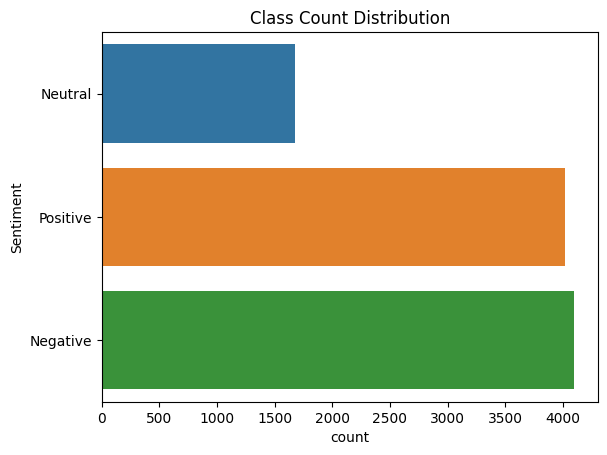

In [28]:
sns.countplot(data=data,y='Sentiment')
plt.title("Class Count Distribution")
plt.show()

In [29]:
positive_tweets = data.loc[data['Sentiment'] == 'Positive', 'OriginalTweet'].tolist()
negative_tweets = data.loc[data['Sentiment'] == 'Negative', 'OriginalTweet'].tolist()
neutral_tweets = data.loc[data['Sentiment'] == 'Neutral', 'OriginalTweet'].tolist()

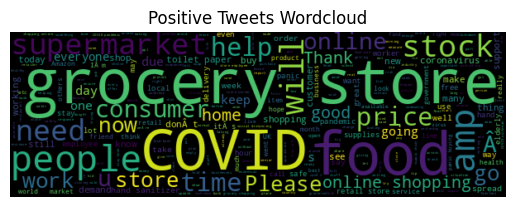

In [30]:

wordcloud = WordCloud(max_words=1500, width=600, background_color='black').generate(" ".join(positive_tweets))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Positive Tweets Wordcloud")
plt.axis("off")
plt.show()

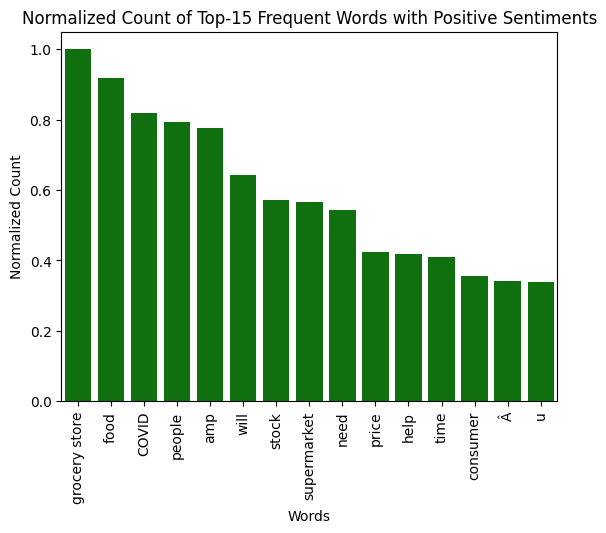

In [31]:
x = []
y = []
for key,value in wordcloud.words_.items(): # loop through the top 15 frequent words in the word cloud and append the word and its count to x and y lists
    x.append(key)
    y.append(value)
    if len(x) == 15:
        break
sns.barplot(x=x,y=y,color='green')
plt.title("Normalized Count of Top-15 Frequent Words with Positive Sentiments")
plt.xlabel("Words")
plt.ylabel("Normalized Count")
plt.xticks(rotation=90)
plt.show()

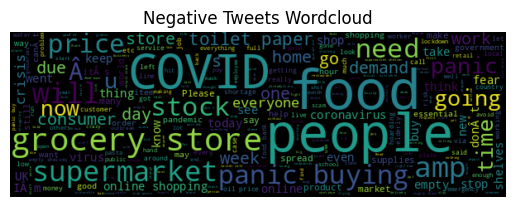

In [32]:
wordcloud = WordCloud(max_words=1500, width=600, background_color='black').generate(" ".join(negative_tweets))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Negative Tweets Wordcloud")
plt.axis("off")
plt.show()

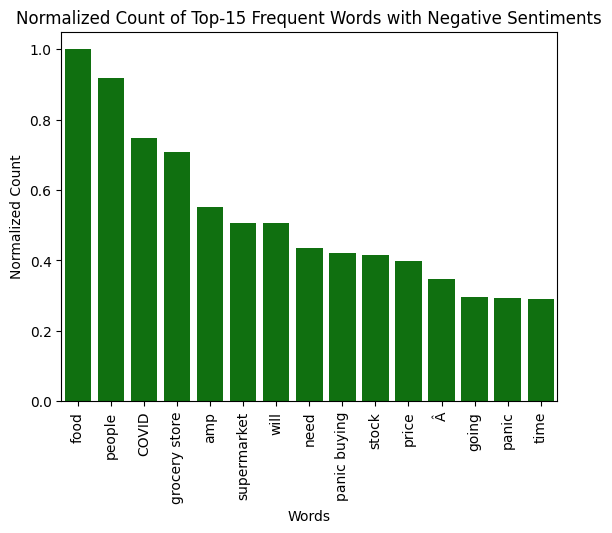

In [33]:
x = []
y = []
for key,value in wordcloud.words_.items(): # loop through the top 15 frequent words in the word cloud and append the word and its count to x and y lists
    x.append(key)
    y.append(value)
    if len(x) == 15:
        break
sns.barplot(x=x,y=y,color='green')
plt.title("Normalized Count of Top-15 Frequent Words with Negative Sentiments")
plt.xlabel("Words")
plt.ylabel("Normalized Count")
plt.xticks(rotation=90)
plt.show()

In [34]:
#label encoding
le = LabelEncoder()
data['Sentiment_encoded'] = le.fit_transform(data['Sentiment'])
data

,OriginalTweet,Sentiment,Sentiment_encoded
0,@MeNyrbie @Phil_Gahan @Chrisitv and and,Neutral,1
1,advice Talk to your neighbours family to excha...,Positive,2
2,Coronavirus Australia: Woolworths to give elde...,Positive,2
3,My food stock is not the only one which is emp...,Positive,2
4,"Me, ready to go at supermarket during the o...",Negative,0
...,...,...,...
9793,Meanwhile In A Supermarket in Israel -- People...,Positive,2
9794,Did you panic buy a lot of non-perishable item...,Negative,0
9795,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral,1
9796,Gov need to do somethings instead of biar je r...,Negative,0


In [35]:
#vectorizing
vectorizer=TfidfVectorizer()
X= vectorizer.fit_transform(data['OriginalTweet'].values.tolist()).toarray()
print(X)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [36]:
y=data['Sentiment_encoded'].values

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [38]:
# Model training and Predictions
knn=KNeighborsClassifier()
sv=SVC()
nb=MultinomialNB()
re=LogisticRegression(max_iter=1000)
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
ab=AdaBoostClassifier()
lst=[knn,sv,nb,re,dt,rf,ab]
for model in lst:
  print("\n model---",model)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print("Accuracy:",accuracy_score(y_test,y_pred)*100)
 #print("Classification report:",classification_report(y_test,y_pred))
 #print(ConfusionMatrixDisplay(y_test,y_pred)) 
  print("__"*100)


 model--- KNeighborsClassifier()
Accuracy: 18.16326530612245
________________________________________________________________________________________________________________________________________________________________________________________________________

 model--- SVC()
Accuracy: 71.0204081632653
________________________________________________________________________________________________________________________________________________________________________________________________________

 model--- MultinomialNB()
Accuracy: 64.48979591836735
________________________________________________________________________________________________________________________________________________________________________________________________________

 model--- LogisticRegression(max_iter=1000)
Accuracy: 73.41836734693878
___________________________________________________________________________________________________________________________________________________________________

# Predictions

In [39]:
## Find out how you can protect yourself and loved ones from #coronavirus. ?               (positive)

## @DrTedros "We canÂ’t stop #COVID19 without protecting #healthworkers.                  (netral)

##@thehill Americans need to take it upon themselves to help avoid contracting covid-19.  (negative)



In [40]:
s="Find out how you can protect yourself and loved ones from #coronavirus. ?"
#y_new=ab.predict(vec.transform([s]))
y_new=rf.predict(vectorizer.transform([s]))
if y_new==1:
  print("Neutral")
elif y_new==2:
  print("Positive")
else:
  print("Negative")

Positive


In [41]:
s='@DrTedros "We canÂ’t stop #COVID19 without protecting #healthworkers.'
#y_new=ab.predict(vec.transform([s]))
y_new=rf.predict(vectorizer.transform([s]))
if y_new==0 :
  print("Neutral")
elif y_new==1 :
  print("Positive")
else:
  print("Negative")

Neutral


In [42]:
s='@thehill Americans need to take it upon themselves to help avoid contracting covid-19.'
y_new=rf.predict(vectorizer.transform([s]))
if y_new==0 :
  print("Neutral")
elif y_new==1 :
  print("Positive")
else:
  print("Negative")

Negative
